In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
file_path = r"C:\Users\SamratKanse\Desktop\SNOW_Training\HR Attrition\WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleanup

In [2]:
# Check for NULL values
print("\nNULL values in the DataFrame:")
print(df.isnull().sum())


NULL values in the DataFrame:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

In [3]:
# Check for duplicates
print("\nNumber of duplicate rows in the DataFrame:", df.duplicated().sum())


Number of duplicate rows in the DataFrame: 0


# EDA

In [4]:
# Check for useful metrics which can be employed in the model
# Display the summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df.describe())


Summary statistics of the DataFrame:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.72993

In [5]:
# Display the data types of each column
print("\nData types of the DataFrame columns:")
print(df.dtypes)


Data types of the DataFrame columns:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel 

In [6]:
# Identify categorical columns for further analysis
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)


Categorical columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [7]:
# Display unique values in each categorical column
for col in categorical_columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].value_counts())


Unique values in column 'Attrition':
No     1233
Yes     237
Name: Attrition, dtype: int64

Unique values in column 'BusinessTravel':
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Unique values in column 'Department':
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Unique values in column 'EducationField':
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Unique values in column 'Gender':
Male      882
Female    588
Name: Gender, dtype: int64

Unique values in column 'JobRole':
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Dire

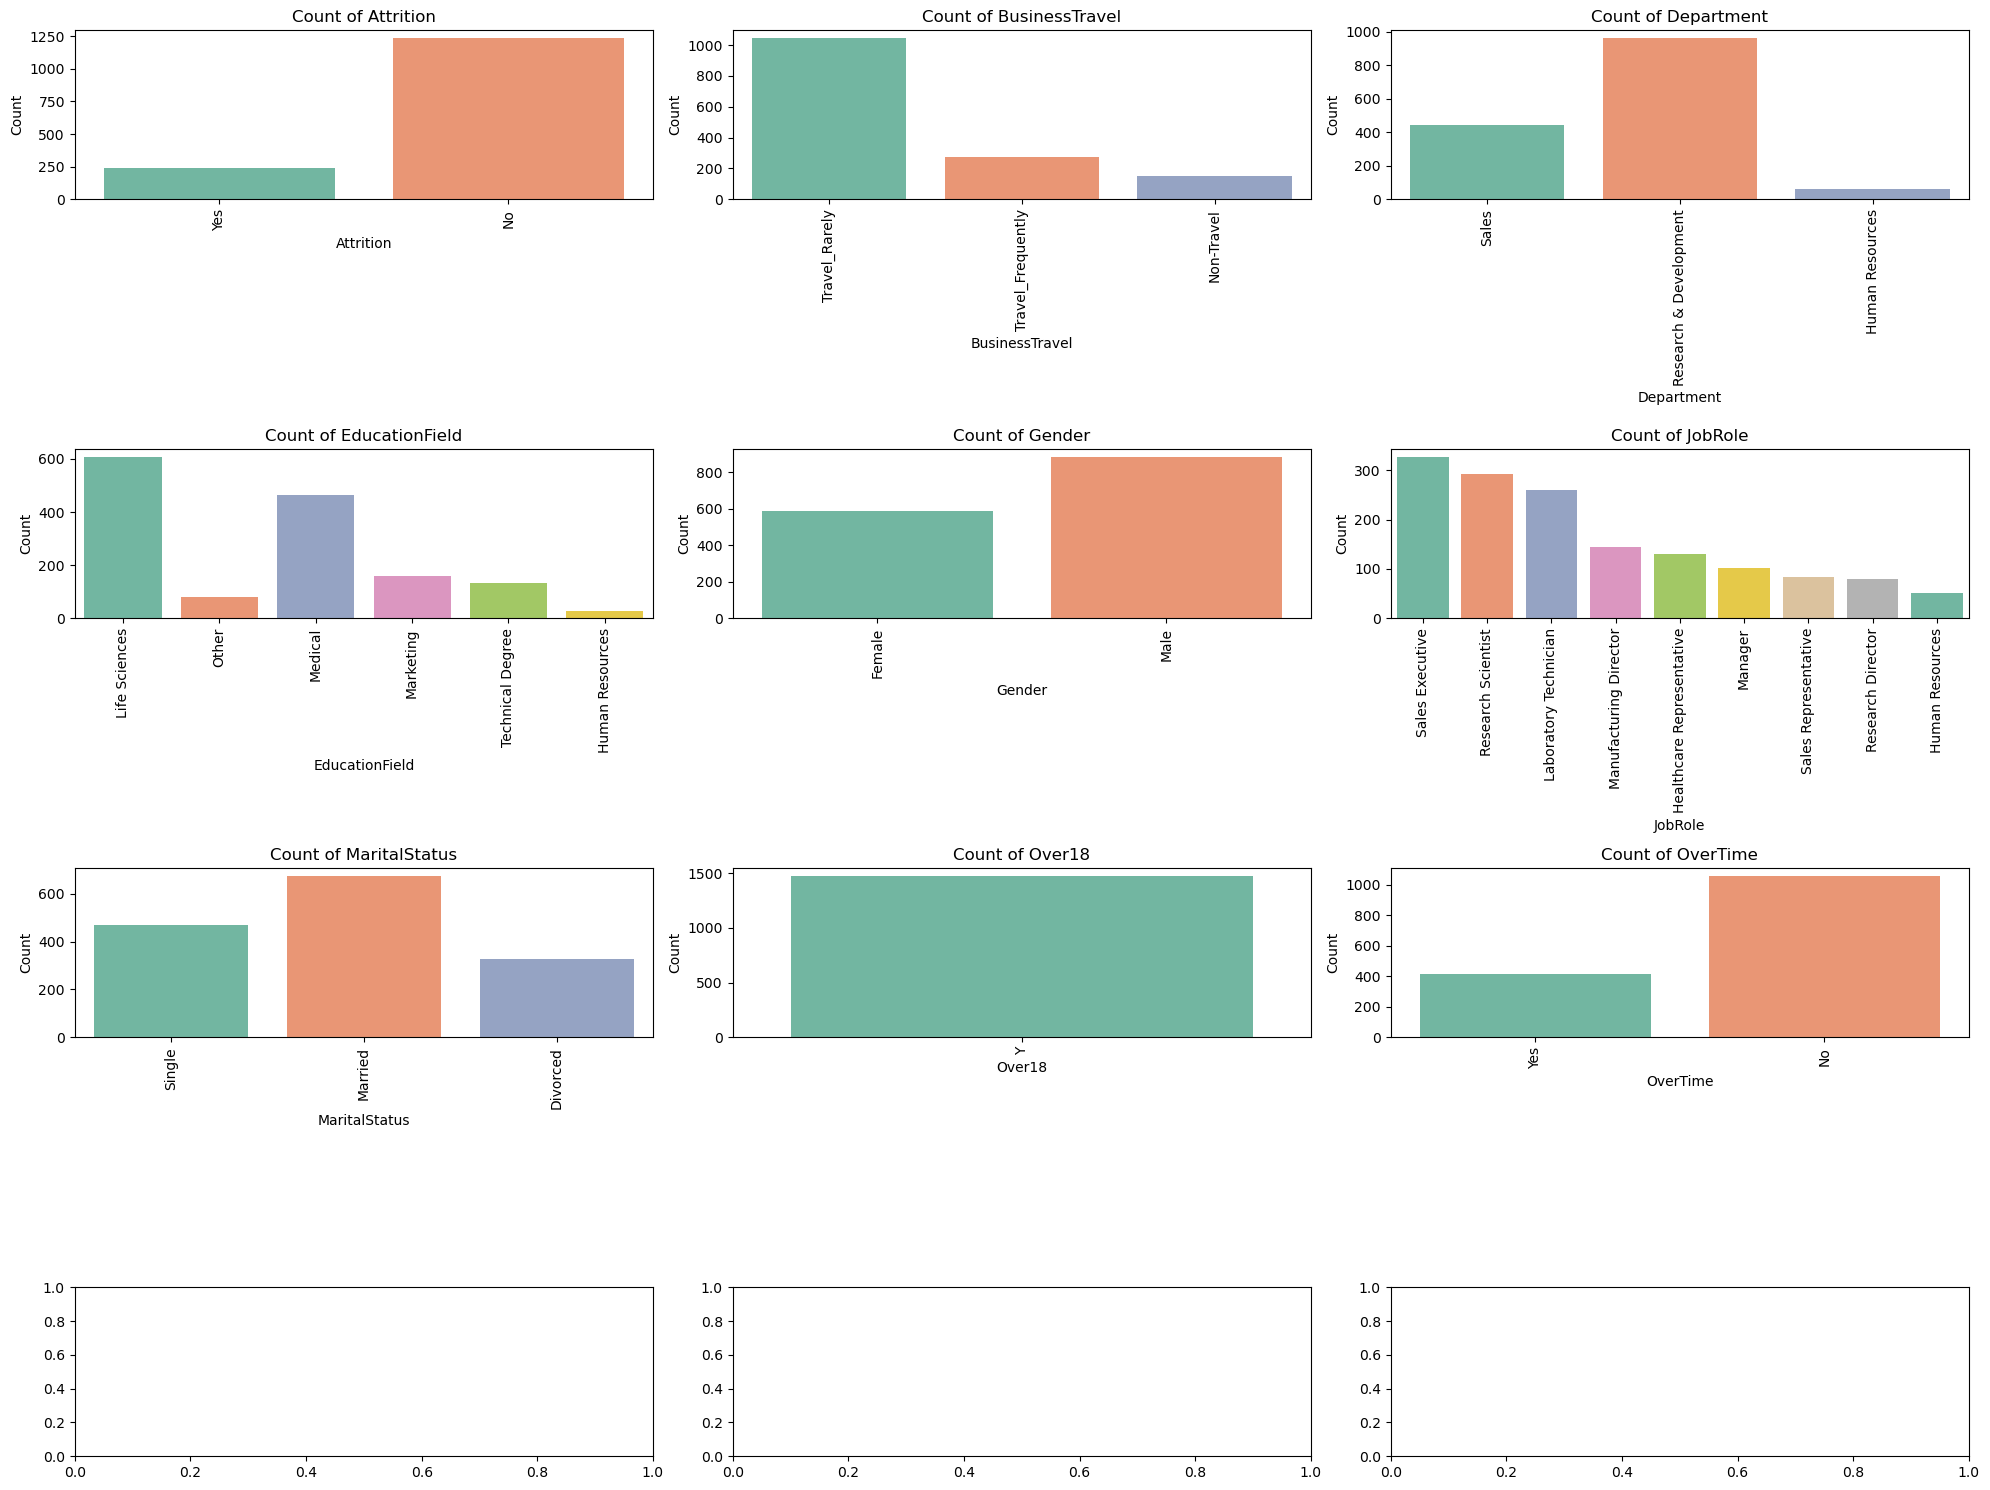

In [8]:
# Function to create bar plots for categorical columns
def plot_categorical_columns(df, columns, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        if i < len(axes):
            sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
            axes[i].set_title(f'Count of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()
    
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create bar plots for the categorical columns
plot_categorical_columns(df, categorical_columns, n_rows=4, n_cols=3)

Insights from the Charts.

Attrition: The dataset shows a higher count of employees who have not left the
company compared to those who have.

BusinessTravel: Most employees do not travel frequently for business. A smaller proportion
travels frequently.

Department: The majority of employees are in the Research & Development department,
followed by Sales and Human Resources.

EducationField: Most employees have an education background in Life Sciences or Medical
fields.

Gender: There is a slightly higher count of male employees compared to female
employees.

JobRole: There are varied job roles, with the highest count in the Sales Executive and
Research Scientist roles.

MaritalStatus: A large proportion of employees are either married or single, with fewer
being divorced.

OverTime: A significant number of employees do not work overtime compared to those
who do.

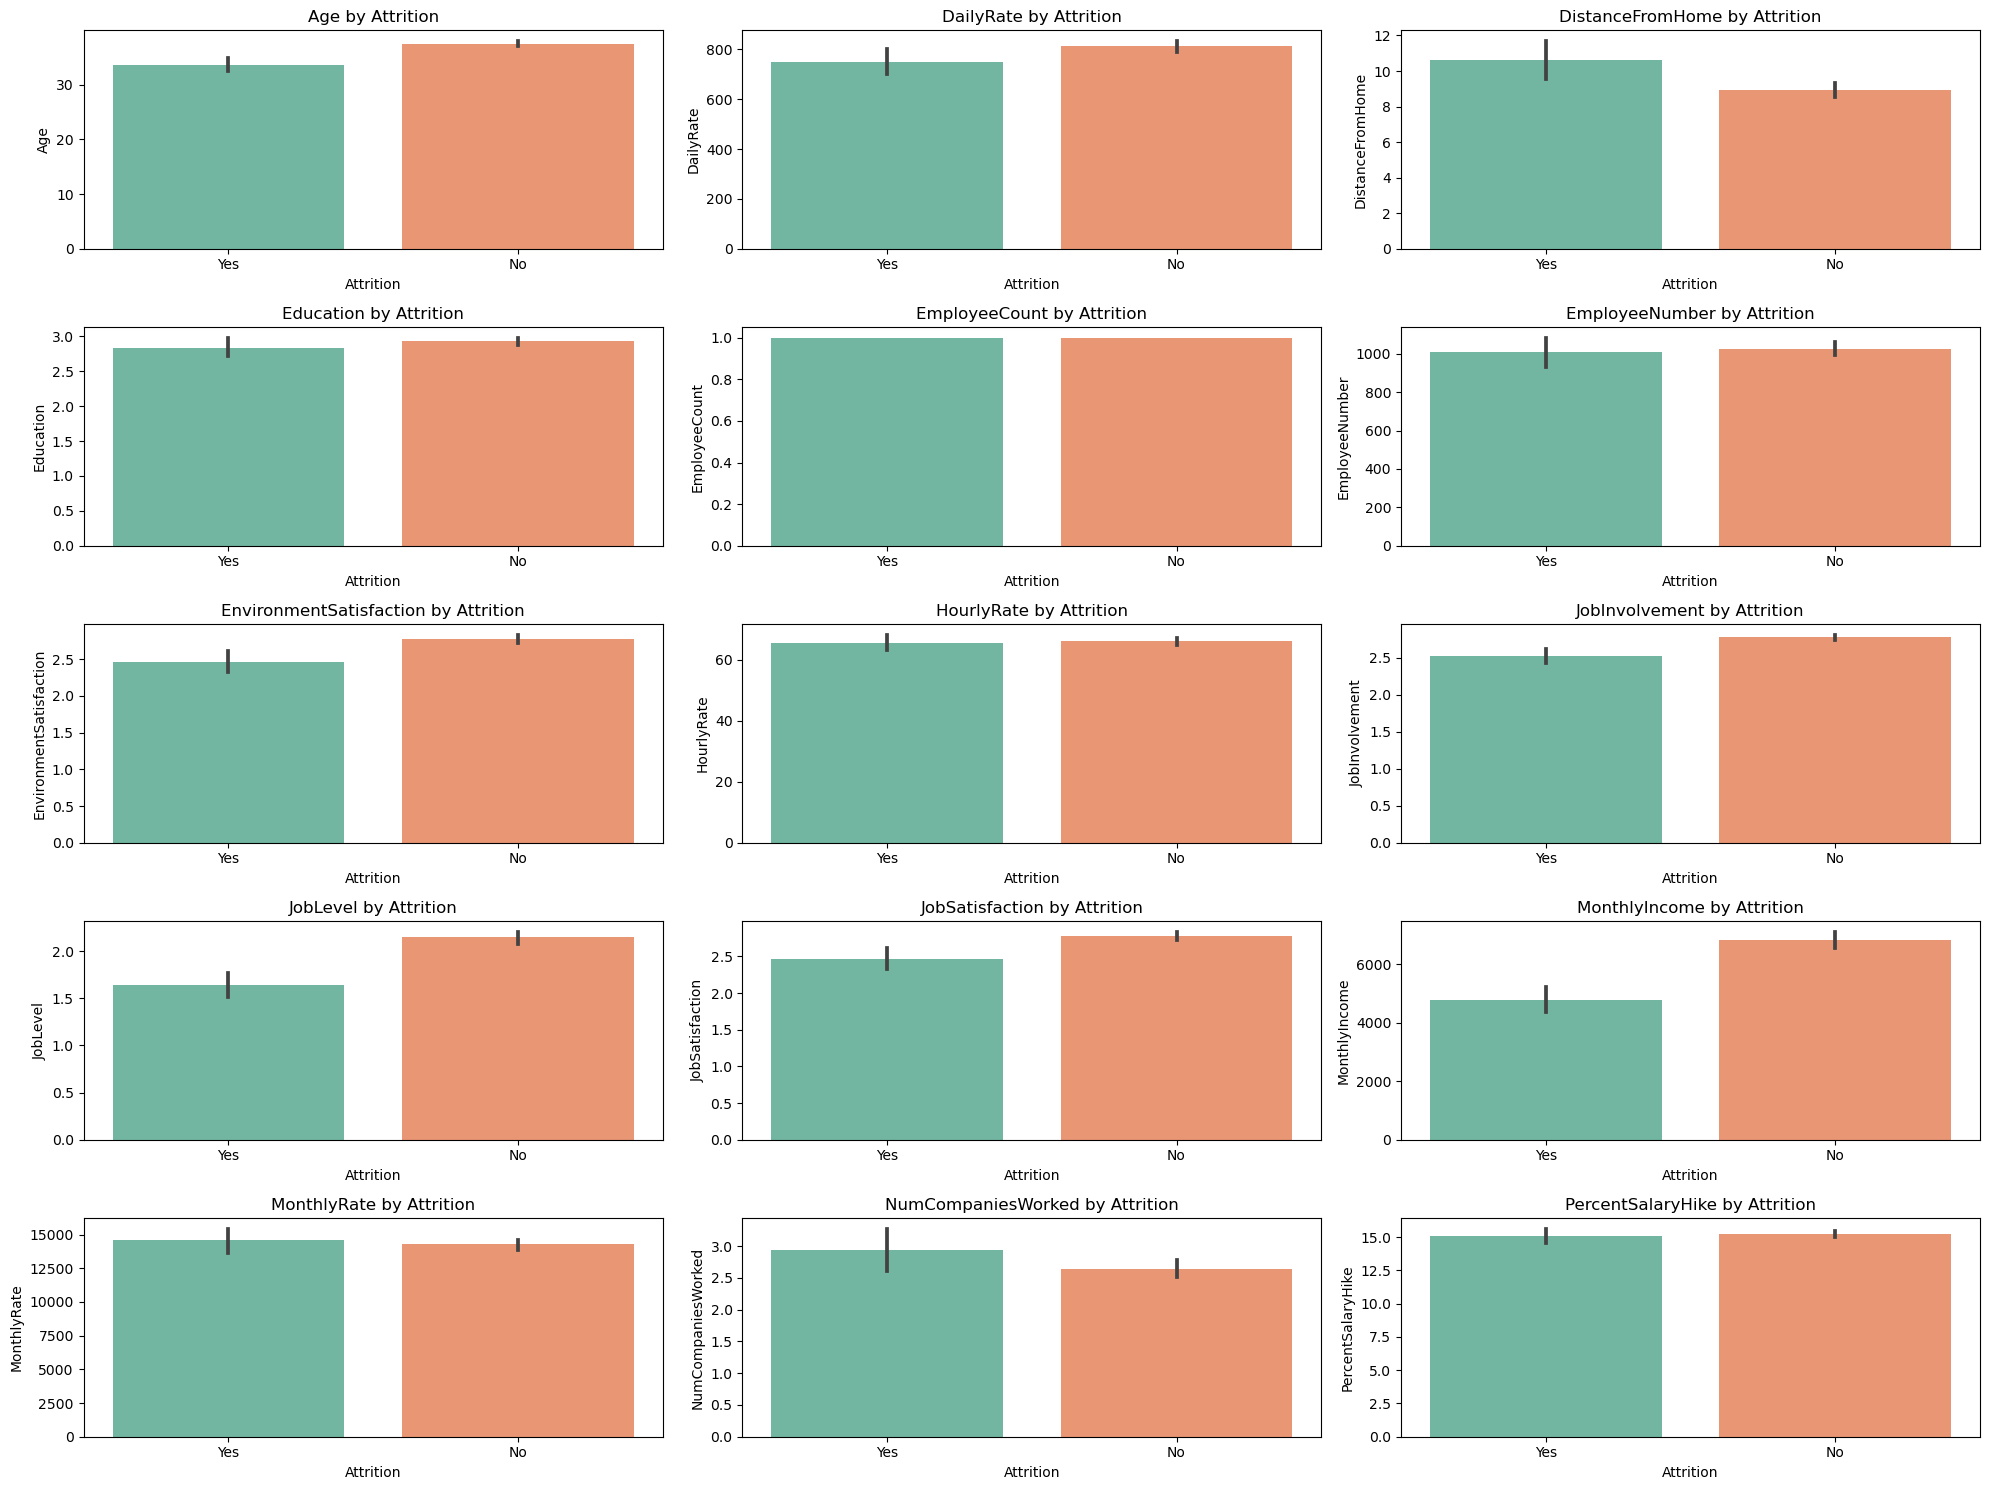

In [9]:
# Function to create bar plots for numeric columns against Attrition
def plot_numeric_columns(df, columns, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        if i < len(axes):
            sns.barplot(data=df, x='Attrition', y=col, ax=axes[i], palette="Set2")
            axes[i].set_title(f'{col} by Attrition')
            axes[i].set_xlabel('Attrition')
            axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()
    
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create bar plots for the numeric columns against Attrition
plot_numeric_columns(df, numeric_columns, n_rows=5, n_cols=3)

Numeric Features Against Attrition

Age: Employees who have left the company tend to be slightly
younger on average than those who have not.

DistanceFromHome: There is no significant difference in the distance from home
between employees who have left and those who have not.

MonthlyIncome: Employees who have not left tend to have a higher monthly
income on average.

TotalWorkingYears: Employees who have stayed with the company tend to have
more total working years.

YearsAtCompany: Employees who have not left have spent more years at the
company on average.

YearsInCurrentRole: Those who have not left have more years in their current role.

YearsWithCurrManager: Employees who have not left tend to have spent more years
with their current manager.

# Model building :Data Preprocessing

In [10]:
def remove_outliers(df):
    # Iterate through each column in the DataFrame that has numeric data types
    for col in df.select_dtypes(include='number').columns:
        # Calculate the first quartile (Q1) for the column
        q1 = df[col].quantile(0.25)
        # Calculate the third quartile (Q3) for the column
        q3 = df[col].quantile(0.75)
        # Calculate the Interquartile Range (IQR) for the column
        iqr = q3 - q1
        # Calculate the lower bound for outliers
        lower_bound = q1 - 2 * iqr
        # Calculate the upper bound for outliers
        upper_bound = q3 + 2 * iqr
        # Filter the DataFrame to include only the rows where the column values are within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    # Return the DataFrame with outliers removed
    return df

In [11]:
# Converting Attrition from object to numerical 
df['Attrition'] = df['Attrition'].replace({'Yes':1 , 'No':0})

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
df.drop(columns=['Over18'] , inplace = True) # Drop the 'Over18' column from the DataFrame and modify the DataFrame in place

In [14]:
#Convert the 'Attrition' column to numeric type.
df['Attrition'] = pd.to_numeric(df['Attrition'], errors='coerce').fillna(0).astype('int64')

In [15]:
df['BusinessTravel'].value_counts() #Calculates the frequency of each unique value in the column.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [16]:
df['BusinessTravel'] = df['BusinessTravel'].replace({'Travel_Rarely':0 ,'Travel_Frequently':1 , 'Non-Travel':3}) #Replace categorical values.
df['BusinessTravel'] = df['BusinessTravel'].astype('int64') #Convert data type

In [17]:
df['Department'] = df['Department'].replace({'Research & Development':0 ,'Sales':1 , 'Human Resources':3}) #Replace categorical values.
df['Department'] = df['Department'].astype('int64') #Convert data type

In [18]:
# Encoding column manually will be a time consuming task hence using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['EducationField'] = encoder.fit_transform(df['EducationField'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['JobRole'] = encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = encoder.fit_transform(df['OverTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

# Model Building: Model Training and Evaluation

In [19]:
# Importing the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying the MinMaxScaler to all columns in the DataFrame df
# This scales each feature to a given range (default is [0, 1])
df[df.columns] = scaler.fit_transform(df[df.columns])

# Displaying the first 5 rows of the scaled DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.000000,0.715820,0.333333,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.0,0.333333,0.126700,0.000000,0.250000,0.00,0.2,0.0,0.000484,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,0.000000,0.909807,0.000000,0.035714,0.25,0.8,0.0,0.001451,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.0,0.333333,0.923407,0.000000,0.071429,0.75,0.2,0.0,0.001935,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,0.000000,0.350036,0.000000,0.035714,0.00,0.6,0.0,0.002903,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [20]:
# Import necessary libraries for model training, evaluation, and visualization
from sklearn.model_selection import train_test_split  # To split the data into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score  # To evaluate the models
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifiers
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.metrics import RocCurveDisplay  # To display the ROC curve
import matplotlib.pyplot as plt  # To plot graphs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # To create and display confusion matrix

# Separate features and target variable from the dataset
X = df.drop('Attrition', axis=1)  # Features (all columns except 'Attrition')
y = df['Attrition']  # Target variable (the 'Attrition' column)

# Encode target labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transform 'Attrition' values to numerical labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Define a dictionary of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Iterate over each classifier in the dictionary
for clf_name, clf in classifiers.items():
    # Train the classifier with the training data
    clf.fit(X_train, y_train)
    
    # Predict the target values for the test data
    y_pred = clf.predict(X_test)
    
    # Generate a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate various evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy
    precision = precision_score(y_test, y_pred)  # Precision
    recall = recall_score(y_test, y_pred)  # Recall
    f1 = f1_score(y_test, y_pred)  # F1 Score
    f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 Score
    
    # Print the evaluation results for the classifier
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"F2 Score: {f2:.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print("---------------------------")


Classifier: Logistic Regression
Accuracy: 0.89
Precision: 0.73
Recall: 0.28
F1 Score: 0.41
F2 Score: 0.32
Confusion Matrix:
[[251   4]
 [ 28  11]]
---------------------------
Classifier: Decision Tree
Accuracy: 0.78
Precision: 0.22
Recall: 0.26
F1 Score: 0.24
F2 Score: 0.25
Confusion Matrix:
[[220  35]
 [ 29  10]]
---------------------------
Classifier: Random Forest
Accuracy: 0.88
Precision: 1.00
Recall: 0.10
F1 Score: 0.19
F2 Score: 0.12
Confusion Matrix:
[[255   0]
 [ 35   4]]
---------------------------


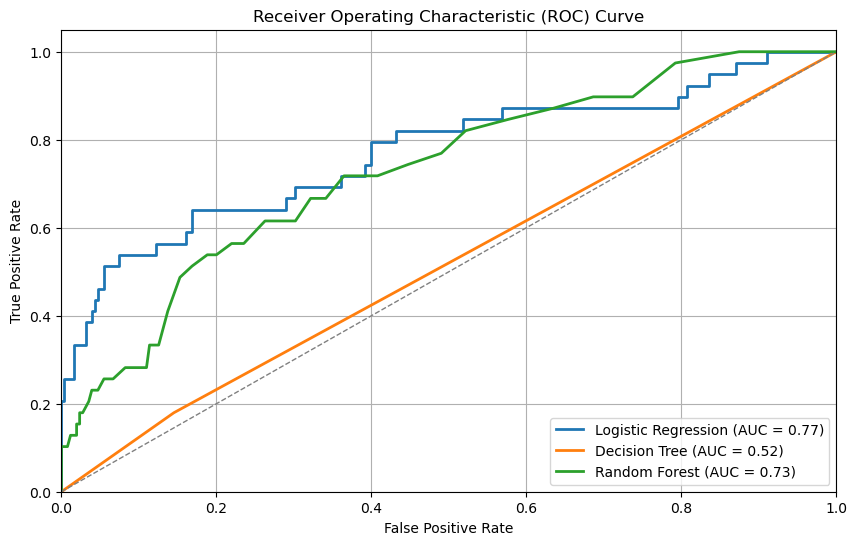

In [21]:
# Import necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Create a figure for plotting the ROC curves
plt.figure(figsize=(10, 6))

# Iterate over each classifier in the dictionary
for clf_name, clf in classifiers.items():
    # Train the classifier with the training data
    clf.fit(X_train, y_train)
    
    # Predict the probability scores for the test data
    y_score = clf.predict_proba(X_test)[:, 1]
    
    # Calculate the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for the classifier
    plt.plot(fpr, tpr, lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the random guessing line (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set the properties for the plot
plt.xlim([0.0, 1.0])  # X-axis range
plt.ylim([0.0, 1.05])  # Y-axis range
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Plot title
plt.legend(loc="lower right")  # Position of the legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot
